## Name- HARSHADA MALI

##### BEGINNER LEVEL TASK 01
Iris Flowers Classification ML Project :
This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

### Importing Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

### Importing Dataset

In [20]:
iris = pd.read_csv("Iris.txt")

In [26]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
iris.shape

(150, 6)

In [23]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [24]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [27]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [28]:
iris.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [29]:
iris["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [30]:
iris.drop('Id',axis=1,inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Exploratory Data Analysis

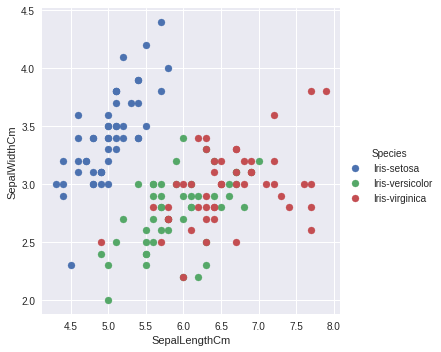

In [31]:
plt.style.use('seaborn')
sns.FacetGrid(iris,hue='Species',height=5).\
            map(plt.scatter,'SepalLengthCm','SepalWidthCm')\
            .add_legend()


Here, we can observe that we can differentiate Setosa flowers from other type of flowers.

Whereas, Versicolor and Vergina are interconnected with each other.

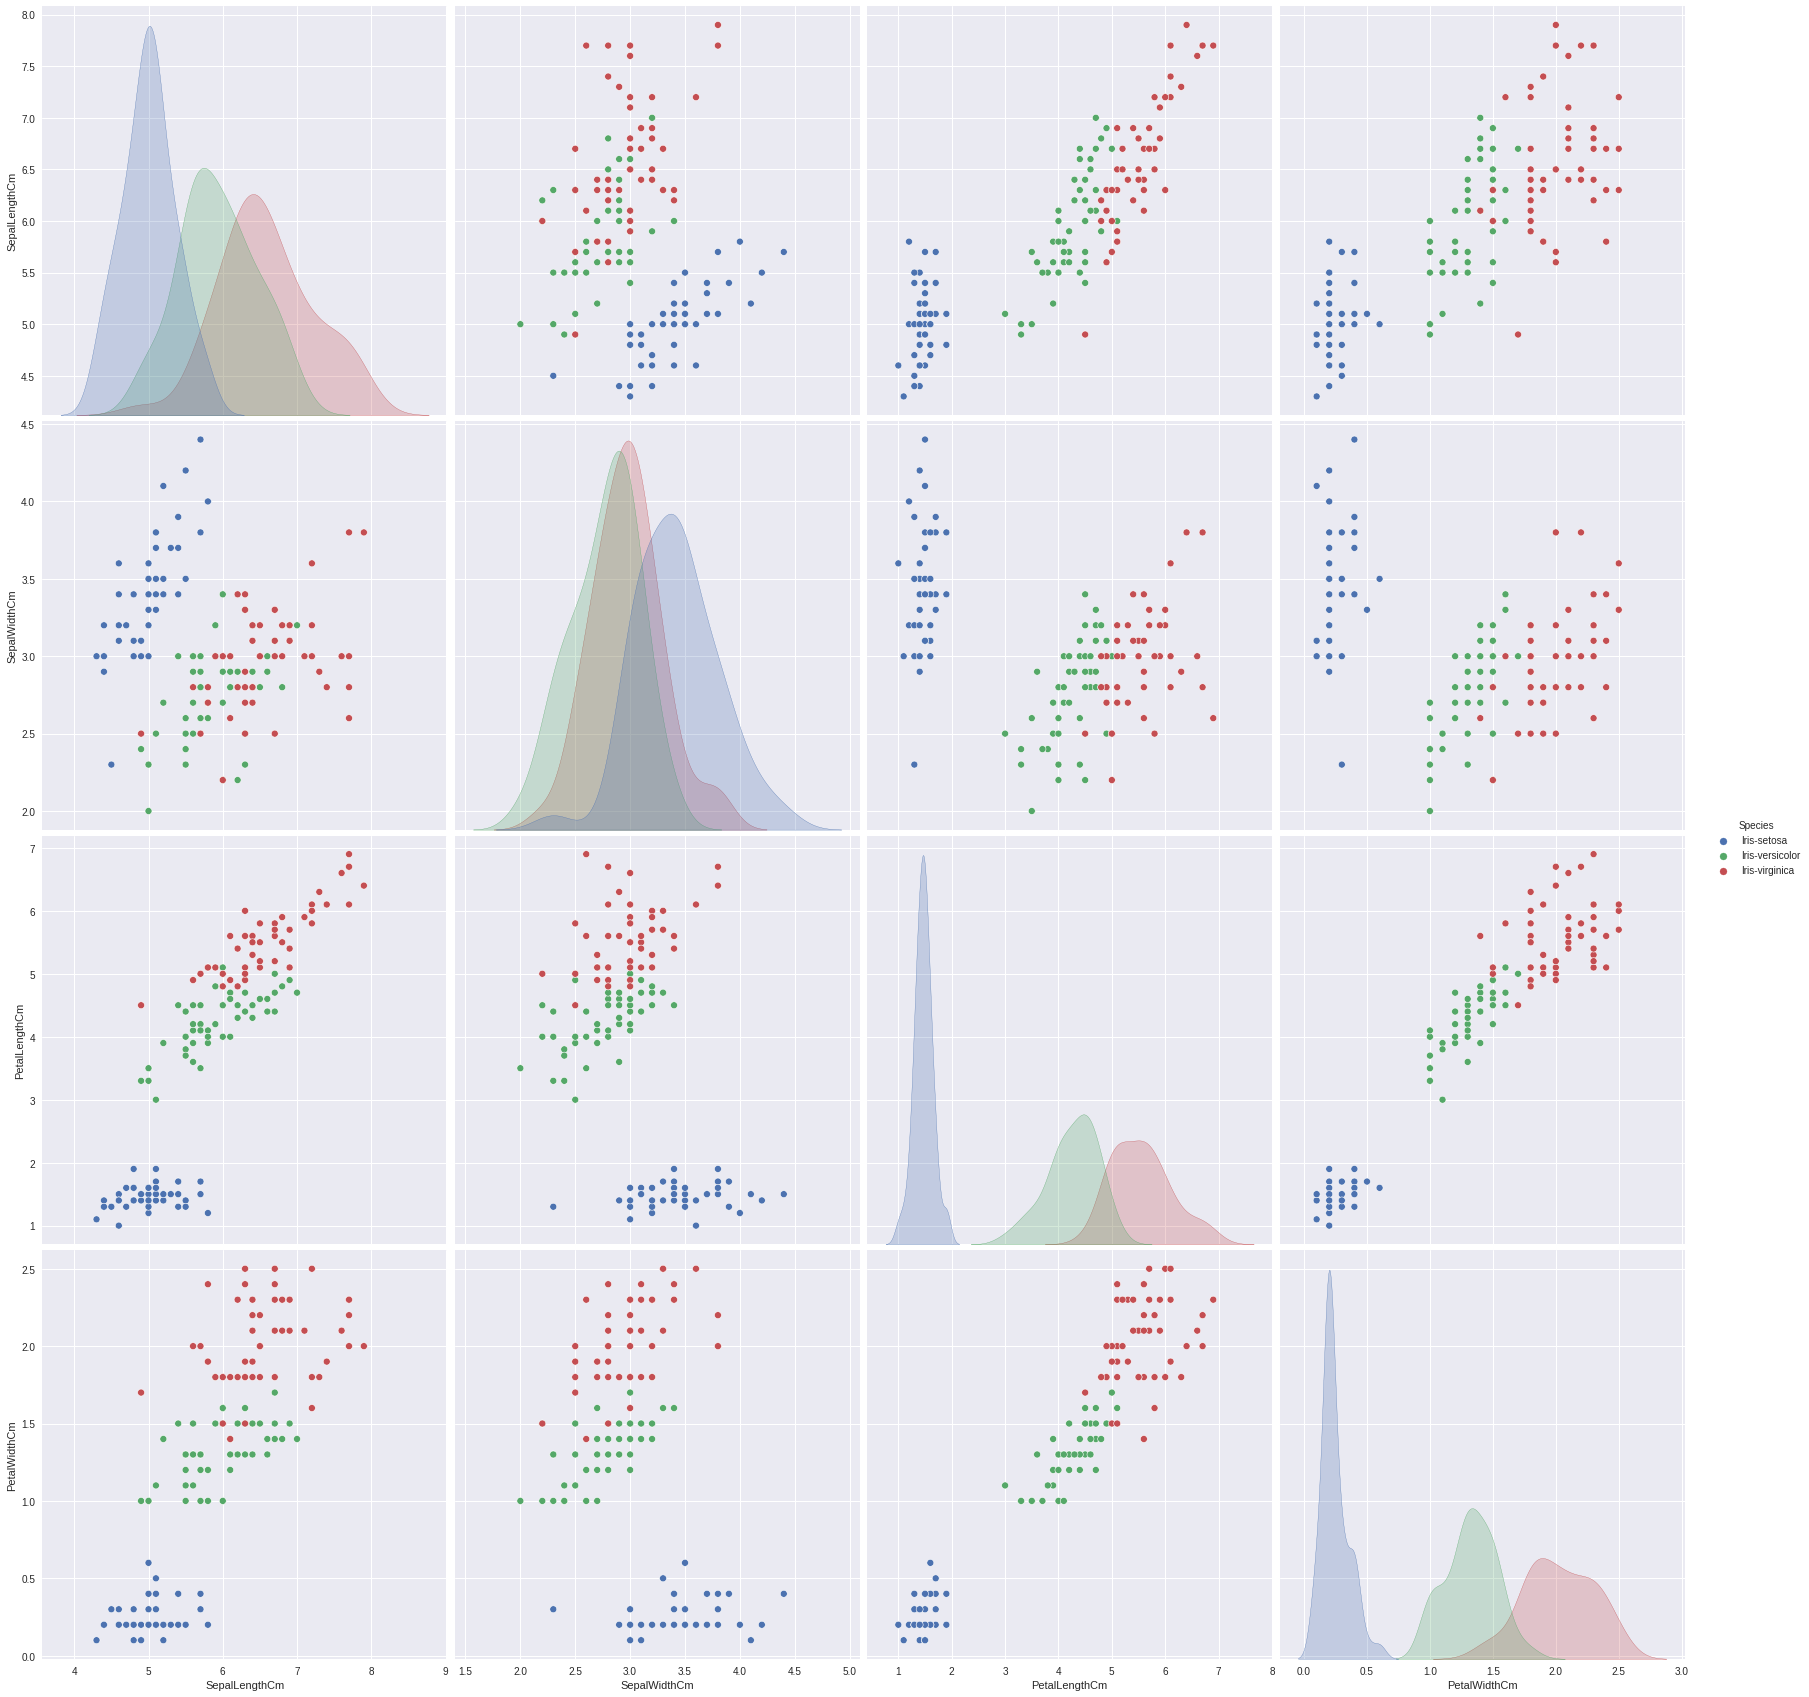

In [34]:
sns.pairplot(iris, hue="Species", height=6)

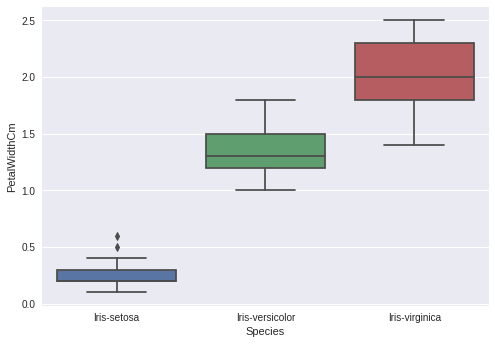

In [35]:
sns.boxplot(x="Species", y="PetalWidthCm", data=iris)

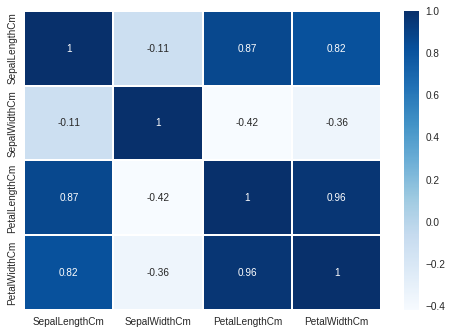

In [36]:
sns.heatmap(iris.corr(),cmap='Blues',annot=True,linewidths=1)
plt.show()


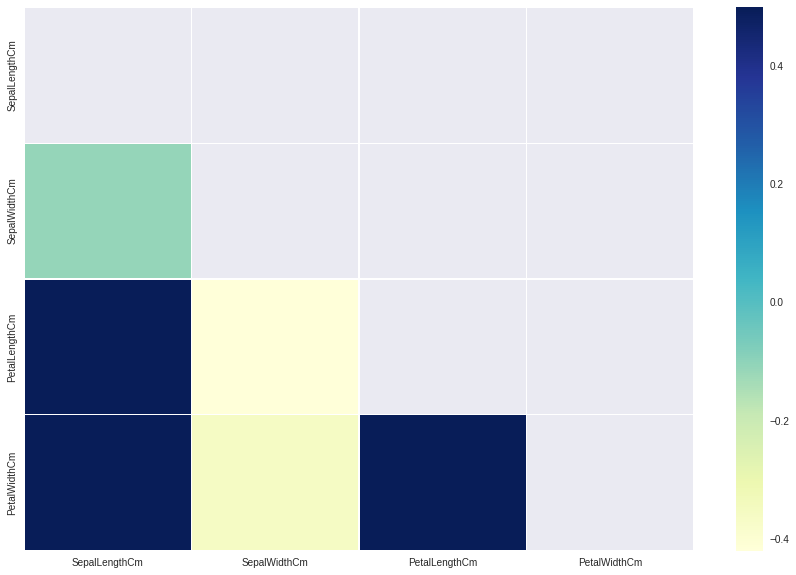

In [37]:
# Calculate correlations
corr = iris.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

Label Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()                                               #LabelEncoder can be used to normalize labels

In [39]:
iris['Species'] = le.fit_transform(iris['Species'])                            #fit_transform: Fit label encoder and return encoded labels
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [40]:
X=iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=iris['Species']

Splitting the Dataset into the Training set and Test set

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 1)

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


## Selecting the Models and Metrics

 #### Support Vector Machine

In [43]:
from sklearn import svm
model=svm.SVC()
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
y_pred=model.predict(X_test)

print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 0.9666666666666667


#### Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=16)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=16, splitter='best')

In [46]:
y_pred=model.predict(X_test)

print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 0.9666666666666667


As we have seen SVM and Decision Tree Models the accuracy is same so lets try Random Forest Classifier

#### Random Forest Classifier

In [66]:
#importing 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
import sklearn.metrics as metrics

In [52]:
#model building
reg_rf = RandomForestClassifier()
reg_rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [53]:
#creating parameter grid for random search
grid_forest_1={'criterion':['gini','entropy'],
      'n_estimators':np.arange(5,200,1),
      'max_depth':np.arange(5,20,1),
      'min_samples_split':np.arange(0.001,0.1,0.01),
      'max_features':['log2','sqrt','auto'],    
      'min_weight_fraction_leaf':np.arange(0.001,0.25,0.05)
}

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
#getting best parameters form random search
reg_rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=grid_forest_1,n_iter=500,n_jobs=-1,cv=5,verbose=1)

In [55]:
reg_rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 302 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 802 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1502 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  5.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [56]:
reg_rf_random.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'log2',
 'min_samples_split': 0.05099999999999999,
 'min_weight_fraction_leaf': 0.101,
 'n_estimators': 52}

In [57]:
#Declare the HyperParameters to tune the model
grid_forest_2={'criterion':['entropy'],
      'n_estimators':np.arange(100,135,5),
      'max_depth':(17,18,19,20,21),
      'min_samples_split':np.arange(0.001,0.01,0.005),
      'max_features':['log2'],    
      'min_weight_fraction_leaf':np.arange(0.0001,0.1,0.005)
}

In [58]:
rf=RandomForestClassifier()
grid_search_rf=GridSearchCV(estimator=rf,param_grid = grid_forest_2,cv=3,n_jobs=-1,verbose=1)
grid_search_rf.fit(X_train,y_train)

Fitting 3 folds for each of 1400 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 4200 out of 4200 | elapsed: 10.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                         'min_samples_split': array([0.001, 0.006]),
                         'min_weight_fract

In [64]:
#Fit and Tune Models with cross-validaion
predicted=cross_val_predict(grid_search_rf,X_test,y_test,cv=2)

Fitting 3 folds for each of 1400 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 4200 out of 4200 | elapsed:  9.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1400 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 4200 out of 4200 | elapsed:  9.9min finished


In [76]:
print ("accuracy",metrics.accuracy_score(y_test, predicted))
print ("f1 score macro",metrics.f1_score(y_test, predicted, average='macro') )
print ("f1 score micro",metrics.f1_score(y_test, predicted, average='micro') )
print ("precision score",metrics.precision_score(y_test, y_pred, predicted, average='macro')) 
print ("recall score",metrics.recall_score(y_test, y_pred, predicted, average='macro') )
print ("hamming_loss",metrics.hamming_loss(y_test, predicted))
print ("classification_report", metrics.classification_report(y_test, predicted))
print ("zero_one_loss", metrics.zero_one_loss(y_test, predicted))
print ("matthews_corrcoef", metrics.matthews_corrcoef(y_test, predicted))



accuracy 0.9666666666666667
f1 score macro 0.957351290684624
f1 score micro 0.9666666666666667
precision score 0.9761904761904763
recall score 0.9641025641025642
hamming_loss 0.03333333333333333
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

zero_one_loss 0.033333333333333326
matthews_corrcoef 0.9488580359780636


Now the accuracy has increased

### Comparision Of Models

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR: 0.975000 (0.053359)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.055902)
CART: 0.966667 (0.040825)
NB: 0.941667 (0.065085)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.941667 (0.083749)
SVM: 0.975000 (0.053359)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


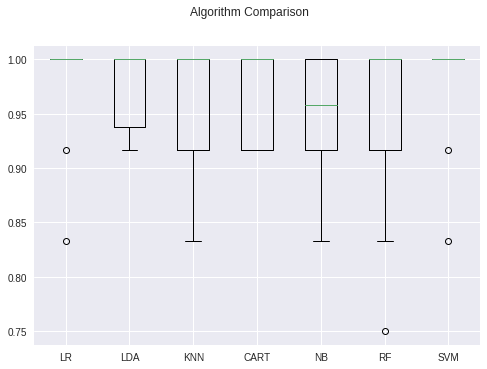

In [77]:
# Compare Algorithms
import pandas 
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF',RandomForestClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring ='accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=42)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [78]:
# intialise data of lists. 
comp = {'Model':['Log_reg', 'KNN', 'DT', 'RF','GBC'],
        'Accuracy':[0.76,0.93,0.93,0.96,0.96],
        'Precision':[0.64,0.92,0.91,0.96,0.96],
        'Recall':[0.57,0.90,0.88,0.93,0.94],
        'f1-score':[0.57,0.91,0.90,0.95,0.95],
        'AUC&ROC':[0.57,0.90,0.88,0.93,0.94]} 
  
comp= pd.DataFrame(comp)
comp

,Model,Accuracy,Precision,Recall,f1-score,AUC&ROC
0,Log_reg,0.76,0.64,0.57,0.57,0.57
1,KNN,0.93,0.92,0.90,0.91,0.90
2,DT,0.93,0.91,0.88,0.90,0.88
3,RF,0.96,0.96,0.93,0.95,0.93
4,GBC,0.96,0.96,0.94,0.95,0.94


### Conclusion:-



Here can see the highest accuracy is achieved by the Random Forest and Naive bayes as compared to other models.